In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataframe
df = pd.read_csv('../csv_files/clean/kc_house_data.csv')
df.drop(['sqft_living15','sqft_lot15'],axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
X = df.iloc[:,3:]
y = df.iloc[:,2]

sc = StandardScaler()
X = sc.fit_transform(X)
# Fit method calculates the mean and variance of training data and scales
# them to normal distribution. Same to the test data using same 
# mean and variance calculated by fit method
# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [7]:
# The cost funtion
def cost_function(X,y,w,b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w)+b) - y) ** 2) / (2*len(y)))
    return cost

In [8]:
def gradient_descent_function(X, y, w, b, alpha= 0.01, epochs = 1000):
    """
    Parameters:
    X: features
    y: target values
    w: inital weights
    b: initial bias
    alpha: learning rate
    epochs: number of iteration
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y) # length of observations
    costs = [0] * epochs
     
#      The [0] * x creates a list with x elements. So,
#     >>> [ 0 ] * 5
#      [0, 0, 0, 0, 0]
#     >>> 
   
    
    # iteration for 1000 times with alpha as learning rate converging to minimum
    for epoch in range(epochs):
        # Calculate the value --- Forward propagation
        z = X.dot(w) + b
        # predicted = w0 + w1*X1 + w2*X2 (Weight * features) 
        # feature matrix X weight matrix gives the equation
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha * weight_gradient
        b = b - alpha * bias_gradient
        
        # Store current cost
        cost = cost_function(X, y ,w, b)
        costs[epoch] = cost
    return w, b, costs
        
    

In [9]:
# Inital random weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0
weights, bias, costs = gradient_descent_function(X_train, y_train, w, b, epochs = 2500);

In [10]:
print(weights)
print(bias)

[-31781.29893257  32944.53624529  79911.3855181    4445.0680216
   3772.8635256   47400.10944933  42082.60974167  15841.20700722
 115400.97612634  73344.79638796  28602.66443668 -78414.84058409
   5998.52024429 -29896.29247782  82414.75507585 -27462.18338408
  13749.68854935  -9617.21957434]
539137.2885462948


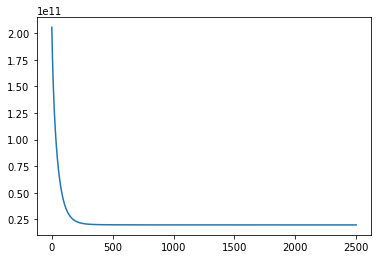

In [11]:
import matplotlib.pyplot as plt
# Plotting the cost function
plt.plot(costs)
plt.show()

In [12]:
def predict(X,w,b):
    return X.dot(w) + b

In [13]:
def r2score(y_pred,y):
    """
    Parameters:
    y_pred: predicted values
    y: actual values
    
    Returns:
    r2: r2 score
    """
    rss = np.sum((y_pred - y) **2)
    tss = np.sum((y-y.mean())**2)
    r2 = 1-(rss/tss)
    return r2

In [14]:
# Predicted values with our model
y_pred = predict(X_test,weights,bias)

In [15]:
r2 = r2score(y_pred,y_test)
print(r2)

0.6934174522682696
